## Introduction
This report runs many models to produce statistical and ML models to try to predict what causes diabetes and if patients have a high likelihood of developing the condition. This project was developed as a project under the university of Furtwangen during the winter semester of 2021 with supervision from Prof. Dr. Peter Schanbacher.

## Diabeties
"Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high." (U.S. Department of Health and Human Services, n.d.)

## Resreach Question
Can the implementation of statistical models or neural networks aid in the prediction of diabetes?

### Datasets used

1. https://data.world/informatics-edu/diabetes-prediction -Biostatistics program at Vanderbilt
1. https://www.kaggle.com/mathchi/diabetes-data-set  -National Institute of Diabetes and Digestive and
2. https://www.kaggle.com/johndasilva/diabetes  -Frankfurt Hospital 
### Known Issues
The data utilized is only from a limited focus group such as Frankfurt Hospitial or rural African-American patients and is not a true representation of the total population. This is due to the limitations of the data avaliable.  

The code is only a proof of concept, hence it is not efficent. The dataset is unbalanced between positive and negative cases inpacting the function of most models.


## Key definitions
1. **Glucose** = Plasma glucose concentration
2. **Blood Pressure** = Diastolic blood pressure (mm Hg)
3. **Skin Thickness** = Triceps skin fold thickness (mm)
4. **BMI** = Body mass index** (weight in kg/(height in m)^2)
5. **Systolic** is the pressure when your heart contracts
6. **Diostolic** is the pressure when your heart is expands
7. Diabetes Pedigree Function = "a function which scores likelihood of diabetes based on family history" - https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16
8. **TP** = True Positive, **TN** = True Negative, **FP** = False Positve, **FN** False Negative
9. **ML** = Machine learning

### Libaries in use:

In [3]:
# scipy
import scipy
print('scipy:', scipy.__version__)
# numpy
import numpy as np
print('numpy:', numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib:', matplotlib.__version__)
# pandas
import pandas as pd
print('pandas: ', pandas.__version__)
# scikit-learn
import sklearn
print('sklearn:', sklearn.__version__)
import math as math
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
print('plt:', matplotlib.__version__)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

scipy: 1.6.2
numpy: 1.20.1
matplotlib: 3.3.4
pandas:  1.2.4
sklearn: 1.0.2
plt: 3.3.4


## Loading the data

In [4]:
data0= pd.read_csv("./data/diabetes.csv")
data0.to_csv("./editedData/editedDiabetes.csv")
data0.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data1= pd.read_csv("./data/diabetes_FrankfurtHospital.csv")
data1.to_csv("./editedData/editedDiabetes_FrankfurtHospital.csv")
data1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
print("Shape:",data0.shape) # 768 rows with 9 columns
round(data0.describe(),2) # describe numerical variables

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
print("Shape:",data1.shape) # 2000 rows with 9 columns 
round(data1.describe(),2) # describe numerical variables

Shape: (2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,3.70,121.18,69.15,20.94,80.25,32.19,0.47,33.09,0.34
std,3.31,32.07,19.19,16.10,111.18,8.15,0.32,11.79,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.38,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,40.00,32.30,0.38,29.00,0.00
75%,6.00,141.00,80.00,32.00,130.00,36.80,0.62,40.00,1.00
max,17.00,199.00,122.00,110.00,744.00,80.60,2.42,81.00,1.00


In [8]:
print(data0["Outcome"].value_counts())
print(data1["Outcome"].value_counts())

0    500
1    268
Name: Outcome, dtype: int64
0    1316
1     684
Name: Outcome, dtype: int64


### The Third Dataset Descriptive Analysis
This is a dataset of rural African-Americans. This is a dataset containing patients that already have diabetes and who do not. 

In [9]:
data2 = pd.read_excel("./data/Diabetes_Classification_rural African-American_patients.xlsx")
data2.head(5)

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN


.Note: Current measurements are in imperial measurements. This should not be a problem for my analysis, however a metric conversion will be nessasary if future work was to be done.

In [10]:
print("Shape:",data2.shape) # 2000 rows with 9 columns 
round(data2.describe(),2) # describe numerical variables

Shape: (390, 18)


,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Unnamed: 16,Unnamed: 17
count,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,1.0,1.0
mean,195.50,207.23,107.34,50.27,4.52,46.77,65.95,177.41,28.78,137.13,83.29,37.87,42.99,0.88,6.0,6.0
std,112.73,44.67,53.80,17.28,1.74,16.44,3.92,40.41,6.60,22.86,13.50,5.76,5.66,0.07,NaN,NaN
min,1.00,78.00,48.00,12.00,1.50,19.00,52.00,99.00,15.20,90.00,48.00,26.00,30.00,0.68,6.0,6.0
25%,98.25,179.00,81.00,38.00,3.20,34.00,63.00,150.25,24.10,122.00,75.00,33.00,39.00,0.83,6.0,6.0
50%,195.50,203.00,90.00,46.00,4.20,44.50,66.00,173.00,27.80,136.00,82.00,37.00,42.00,0.88,6.0,6.0
75%,292.75,229.00,107.75,59.00,5.40,60.00,69.00,200.00,32.28,148.00,90.00,41.00,46.00,0.93,6.0,6.0
max,390.00,443.00,385.00,120.00,19.30,92.00,76.00,325.00,55.80,250.00,124.00,56.00,64.00,1.14,6.0,6.0


This dataset contains 390 observations and 18 columns. We can see that there will need be to some data sorting.

In [11]:
print(data2["Diabetes"].value_counts())

No diabetes    330
Diabetes        60
Name: Diabetes, dtype: int64


#### Positivity Rate
We can see that there are 60 cases of diabetes and 330 negative cases. Positivity rate of 18.18% (60*100)/330. With a negative percentage of 81.82% (100-18.18) which is a 5:1 ratio. This means that any model must do better than 81% as we would get an 81% accuracy if we guessed all negative. This will be an issue in the future as my models will prefer to guess negative as this gives a higher performance at the expense of the True Positive rate (TP). 

In [12]:
#try except to edit the data. If no try/except it will currupt the data
try:
    #Removing Junk caragories. If they have already been removed the error is handled.
    data2 = data2.drop(columns="Unnamed: 16")
    data2 = data2.drop(columns="Unnamed: 17")
    data2 = data2.drop(columns="Patient number")
    #Replacing Female and male with 1 = male
    data2["Gender"]=np.where(data2["Gender"]=="female",0,1)
    #Replacing Diabetes/No diabetes with binary values 1 = true
    data2["Diabetes"]=np.where(data2["Diabetes"]=="Diabetes",1,0)
except:
    print("//--Values have already been changed--//")
    
data2.to_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx", index=False)
data2.head(5)

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


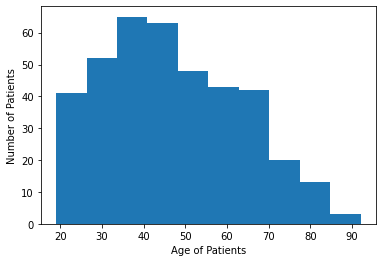

In [13]:
#The histogram below shows the age distrobution of my dataset.
plt.hist(data2["Age"])
plt.ylabel('Number of Patients')
plt.xlabel("Age of Patients")
data2.dropna(inplace=True)
plt.show()

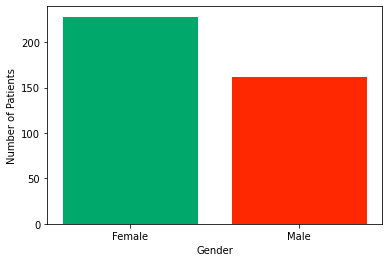

In [400]:
PositiveCount = data2["Gender"].value_counts()[1]
NegativeCount = data2["Gender"].value_counts()[0]

#Add data to array
heightOfBars = [NegativeCount,PositiveCount]
bars = ('Female', 'Male')
y_pos = np.arange(len(bars))

# Create bars and style
plt.bar(y_pos, heightOfBars, color=[("#00A86B"),'#ff2800'])

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel('Number of Patients')
plt.xlabel("Gender")
# Show graphic
plt.show()

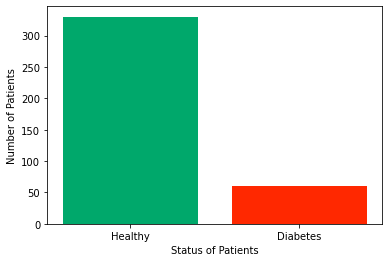

In [141]:
#Inspired from: https://www.width.ai/pandas/count-specific-value-in-column-with-pandas
#Find and count the Patients
PositiveCount = data2["Diabetes"].value_counts()[1]
NegativeCount = data2["Diabetes"].value_counts()[0]

#Add data to array
heightOfBars = [NegativeCount,PositiveCount]
bars = ('Healthy', 'Diabetes')
y_pos = np.arange(len(bars))

# Create bars and style
plt.bar(y_pos, heightOfBars, color=[("#00A86B"),'#ff2800'])

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel('Number of Patients')
plt.xlabel("Status of Patients")
# Show graphic
plt.show()

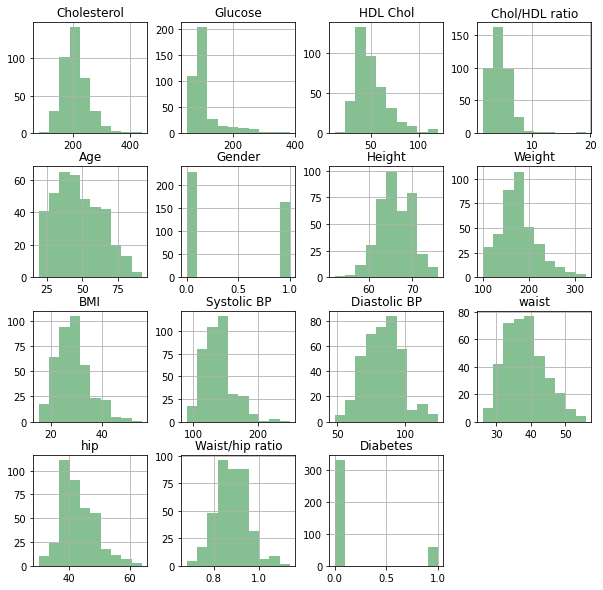

In [17]:
# Univariate Histograms
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
df.hist(color='#86bf91',figsize = (10,10))
plt.show()

### Univariate Histograms
This diagram shows that there are no 0 values and that there are no strong outliers.

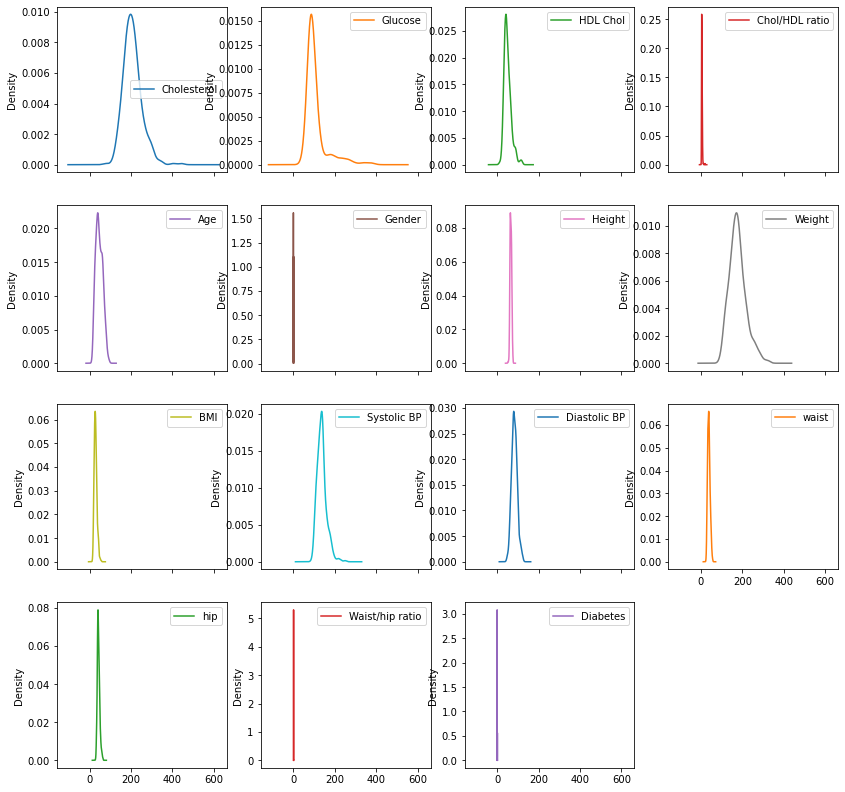

In [18]:
# Univariate Density Plots
#This shows the density of the values 
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
df.plot(kind='density', subplots=True, layout=(4,4),figsize = (14,14))
plt.show()

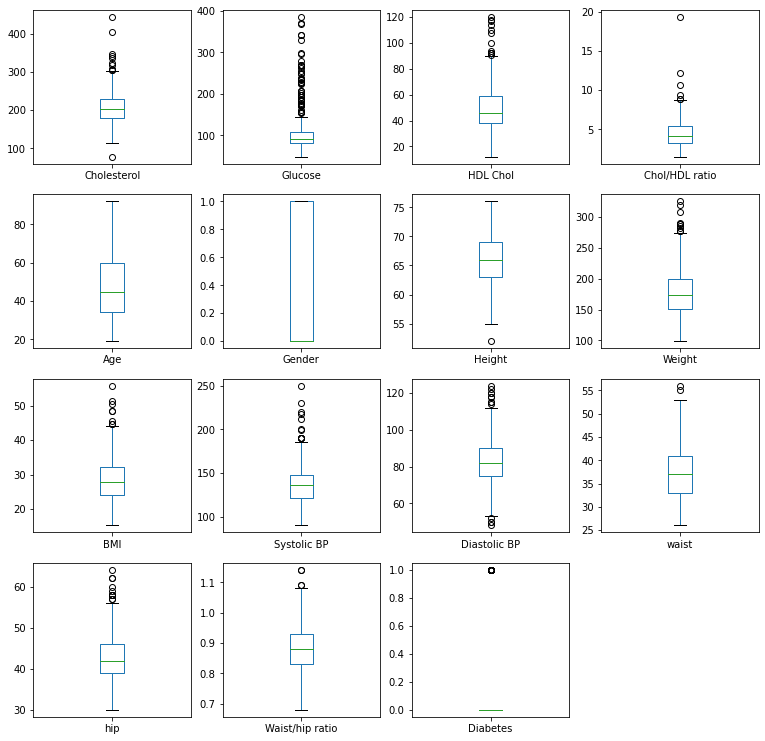

In [19]:
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
df.plot(kind='box', subplots=True, layout=(4,4),figsize = (13,13))
plt.show()

The reason for the many outliers is that most of the patients test negative for diabeties thus the average is dragged down causing more outliers. All values presented are physically possible.

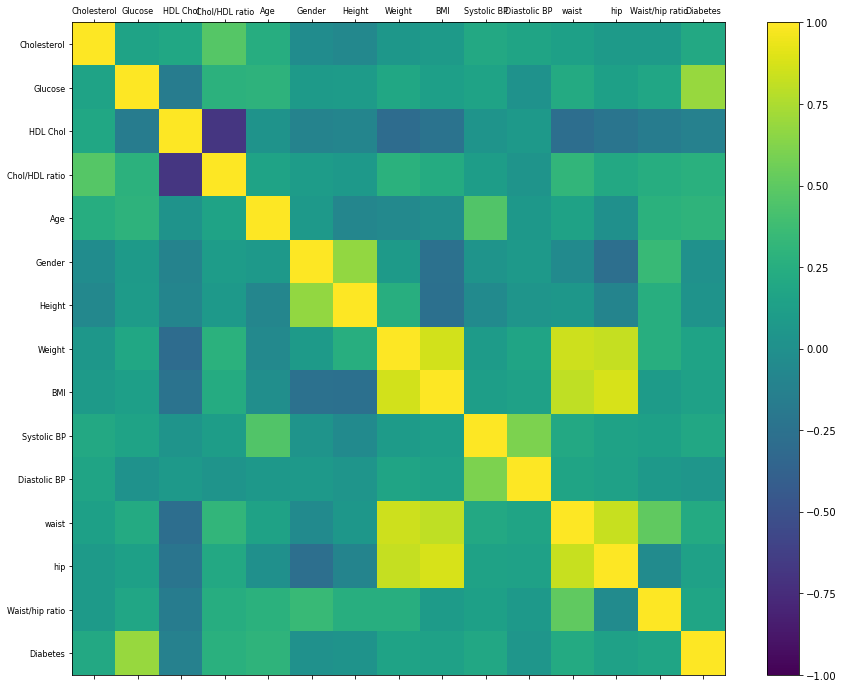

In [20]:
# Correlation Matrix Plot
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.tick_params(labelsize=8)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Strong Relationship between > 0.50:
* Height and Gender
* BMI and Weight
* Waist and Weight
* Waist and BMI
* Hip and Weight
* Hip and BMI

### Weak Relationships > 0.25 && < 0.50
* HDL Chol and Cholesterol
* Systolic BP and Age
* Hip to Waist Ratio and Waist
* Hip to Waist Ratio and Gender

Most of these are given values such as men are taller on average. Also found is that with a greater hip and waist value the BIM and weight of the person tends to trend up, this is expected. Interestingly enough Systolic BP and Age have a correlation.

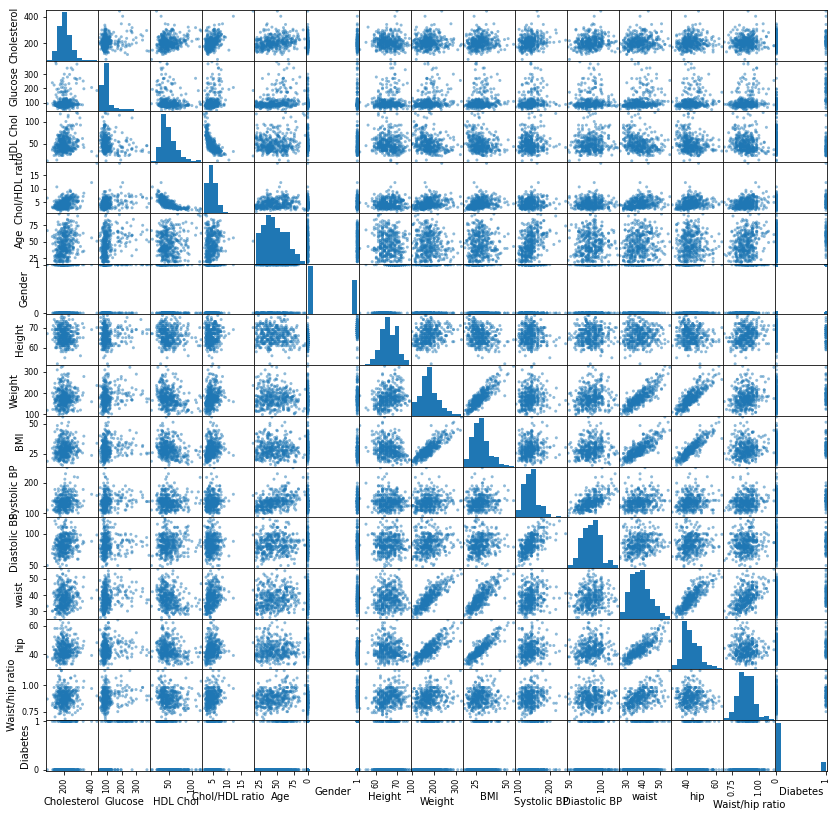

In [21]:
# Scatterplot Matrix
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
pd.plotting.scatter_matrix(df,figsize = (14,14))
plt.show()

### Standardization
In the following code block I will be rescalling the data to make it fit between 0 and 1 standard deviation. This is done so I can use the data in algorithms.

In [142]:
# Standardize data (0 mean, 1 stdev)
df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")

array = df.values
headerData = list(df.columns.values)
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,-1]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=2)
print(rescaledX[0:5,:])


df = pd.DataFrame(rescaledX)
#Creating a new dataframe based of Y and then inserting the dataframe
df2 = pd.DataFrame(Y)
#Adding the dataframe df2 to the main datafram "df"
df.insert(14, "14", df2)
#Adding headers back to the datafram
# df3 = pd.DataFrame(headerData)
df4 = df.set_axis(['Cholesterol','Glucose','HDL Chol','Chol/HDL ratio','Age','Gender','Height','Weight','BMI','Systolic BP','Diastolic BP','waist','hip','Waist/hip ratio','Diabetes'], axis=1, inplace=False)
df4.to_excel("./StdNormScaleData/StandardizeData.xlsx", index=False)

[[-0.32 -0.56 -0.07 -0.36 -1.69 -0.84 -1.27 -1.45 -0.95 -0.84 -0.99 -1.02
  -0.88 -0.57]
 [-1.37 -0.53 -0.54 -0.53 -1.69 -0.84 -1.52 -1.05 -0.36 -1.28 -1.88 -0.85
  -0.53 -0.7 ]
 [ 0.22 -0.6   0.22 -0.3  -1.63 -0.84  0.27  0.24  0.08 -1.19 -0.84  0.37
   0.35  0.12]
 [ 0.42 -0.19  1.14 -0.76 -1.63 -0.84 -0.5  -1.57 -1.39 -0.66 -1.43 -1.19
  -0.71 -1.25]
 [-0.97 -0.3   0.97 -1.22 -1.63 -0.84  1.03 -0.9  -1.3  -0.66  0.2  -1.02
  -0.71 -0.84]]


## Feature Selection

In [143]:
# recursive feature elimination
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,-1]

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=3) # features to select
fit = rfe.fit(X, Y)
print("Num Features:", fit.n_features_)

my_scores = pd.DataFrame([fit.support_, fit.ranking_], columns = df.columns[0:-1], index = ["selected:", "ranking:"]) # data = scores, columns = attribute names
print(my_scores.round(1).to_string())

my_scores.to_excel("./StdNormScaleData/recursive_feature_elimination.xlsx", index=False)

Num Features: 3
          Cholesterol Glucose HDL Chol Chol/HDL ratio   Age Gender Height Weight   BMI Systolic BP Diastolic BP  waist    hip Waist/hip ratio
selected:       False    True    False          False  True  False  False  False  True       False        False  False  False           False
ranking:            2       1        4              8     1      5      9     12     1           3            7     10     11               6


The most significant variables that have the greatest inpact are Glucose, Age and BMI. Variables such as weight could be removed.

## Running and Comparing Algorithms

INPUT: [Standardization data]
LR: 0.915385 (0.066913)
LDA: 0.923077 (0.062807)
KNN: 0.897436 (0.088823)
CART: 0.792308 (0.223371)
NB: 0.897436 (0.088823)
SVM: 0.907692 (0.074491)


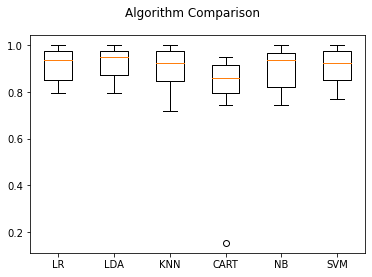

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
use_standardisedData = True

if use_standardisedData == False:
    df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
    print("INPUT: NOT [Standardization data]")
else:
    df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
    print("INPUT: [Standardization data]")
    
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Shown in this alaysis is that most algorithms perform well with the exception of the CART analysis which has one outlier which is extremely poor performing at 0.22. The KNN network has a lower whisker than the other algorithms. The higher quantiles are consistently smaller than the lower quantiles suggesting it gets increasingly difficult to increase performance.

#### Logistic Regression Cross Vlidation Classification Report

In [63]:
#Cross vlidation classification report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


df = pd.read_excel("./editedData/editedDiabetes_Classification_rural African-American_patients.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted_prob = model.predict_proba(X_test)
predicted = np.where(predicted_prob[:,0] > 0.7,0,1)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       106
         1.0       0.87      0.57      0.68        23

    accuracy                           0.91       129
   macro avg       0.89      0.77      0.81       129
weighted avg       0.90      0.91      0.90       129



This report has run logistic regression models for the predictions for the classes of positive (1) and negative (0). The precision score shows that we do not have many false positives and that predicting a negative is more difficult. This will be due to the lack of positive data observations. When it comes to false negatives in the recall column, we see that we do not have many false negatives for negative results however almost half of the positives are falsely reported as negative. This will also be due to the lack of positive observations. 

High number of false negatives in the recall column for the positive observations.

The F1 score is the combination of both precision and recall showing that overall, our model has difficulties predicting positive observations and has a bias to predict positive results as negative giving the model a negative bias.  
Source: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9


In [64]:
import statsmodels.api as sm
Xz = df[df.columns[:-1]]
Yz = df["Diabetes"]
X2 = sm.add_constant(Xz)
est = sm.Logit(Yz, X2)
est2 = est.fit()
print(est2.summary())

#copearing the data is difficult becuase of the scaled variable inputs. 
#The P value describes weather the value has just occured by chance. if the P value is below 5% it is significant.

Optimization terminated successfully.
         Current function value: 0.208602
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                  390
Model:                          Logit   Df Residuals:                      375
Method:                           MLE   Df Model:                           14
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                  0.5141
Time:                        17:18:06   Log-Likelihood:                -81.355
converged:                       True   LL-Null:                       -167.44
Covariance Type:            nonrobust   LLR p-value:                 2.503e-29
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.3363     27.267     -0.599      0.549     -69.778      37.106
Cholesterol   

You can see that in the P column above we see that the values that did not occur by chance were Glucose and Age. The important coefficients were Chol/HDL ratio, Gender and Waist/hip ratio. 

## Performance Evaluation

Test and train split logistic regression model. 

In [140]:
# Evaluate using a train and a test set
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

test_size = 0.33
seed = 0  # fix seed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 89.147%


This model uses the test data to test the result of the regression analysis with an accuracy of 89.147% with a test_size of 33% of the data.

**k-fold Cross-Validation**

In [85]:
# Evaluate using Cross Validation
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 91.538% (6.691%)


This algorithm shuffles, and splits data into n groups(10). One group will be saved for testing whereas the rest of the data will be taken for training. The model is then tested against a regression model. This is different from the previous model as the data is treated differently as it is shuffled randomly giving the model a better performing result of 91% accuracy.
  
Sorece: https://machinelearningmastery.com/k-fold-cross-validation/

**Leave-One-Out Cross Validation**

The Leave-One-Out Cross Validation is similar to the k-fold Cross-Validation however it only folds once and the number of groups is set to the number of observations.

In [88]:
# Evaluate using Leave One Out Cross Validation
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 92.051% (27.050%)


We can see that this method improved the performance of the network to 92.051%. This is the second-best performing model that is not a ML algorithm. This is due to this algorithm scaling its data distribution to the dataset. The performance is due to the limited data I have available as having only one-fold would improve performance as there is limited positive observations meaning that these observations are less diluted.

**Repeated Random Test-Train Splits**

This model is a hybrid between train-test and k-fold models where the data is split into random groups and is then trained and tested multiple times.
Source:https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn

In [89]:
# Evaluate using Shuffle Split Cross Validation
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 92.093% (1.655%)


This is the best performing model. I believe the performance gain is due to the model using both the advantages of test-train and k-folding to randomize the data. 

## Performance Metrics

This section focuses on the accuracy the statistical models. 

In [147]:
# Cross Validation Classification Accuracy
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.915 (0.067)


We can see that there has been an a_split of 10 which has split the data into 10 groups. These groups are than trained and tested against eachother. We can also see that we are using logistic regression. We can see that we have a good performing network, however this is the only insight we get from this network.
Source:https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

### Cross Validation Classification ROC AUC

This model uses liniar regression and Roc_Auc to measure the ability to distinguish between true positive rate (TPR) against the false positive rate (FPR). I have run this on my data.

In [149]:
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
#I used a_nsplit of 9 as a n_split of 10 does not work.
kfold = KFold(n_splits=9)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.837 (0.278)


We canā see that the area under the curve is equal to 0.837. This number represents its ability to see whether the test variable is a TP or a FP. We can see the model performs well for a Roc_Auc however other models outperform this model. I believe the issue with this model is that it is difficult for the model to determine whether an observation is a positive as there is not many observations of positive cases. There is a **low** sensativity to positive cases and **high** sensativity to negative cases.

<img src="./photos/40UsX.png" alt="drawing" width="300" style="float: left;"/>

Source:https://stats.stackexchange.com/questions/160935/relationship-between-roc-receiver-operating-characteristic-curve-and-cross-ove

The image shows how an Roc_Auc model performs

#### Cross Validation Classification Confusion Matrix


In [153]:
# Cross Validation Classification Confusion Matrix
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print("Accuracy = ",round(accuracy_score(Y_test, predicted),2))

[[105   1]
 [ 13  10]]
Accuracy =  0.89


As shown in the image we can see that the confusion matrix has shown that in the Actual 0 row we have a good TN rate with only one FP. However, when it comes to the actual 1 row we have a almost 50/50 split between FN and TP. This means that this model is almost 100% correct at predicting negatives however only 50% correct when predicting positives. 

<img src="./photos/C13314_06_05.png" alt="drawing" width="300" style="float: left;"/>

Source:https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

[[104   2]
 [ 10  13]]
Accuracy =  0.91


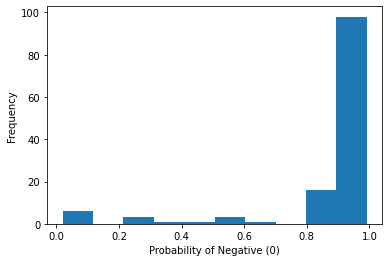

In [162]:
predicted_prob = model.predict_proba(X_test)
plt.hist(predicted_prob[:,0])
plt.xlabel("Probability of Negative (0)")
plt.ylabel("Frequency")
threshold = 0.8 # define treshold probability level
predicted = np.where(predicted_prob[:,0] > threshold,0,1) # predicted probability of first class larger than threshold
#print(predicted)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print("Accuracy = ",round(accuracy_score(Y_test, predicted),2))

We see similar results here where the model is good at detecting TN however very poor at predicting TP. This chart shows many predictions of negatives which is high and the predictions of negatives is infrequent which is expected from the poor performance of this model.

#### Logistic Regression 

Normal regression model.

In [168]:
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9153846153846155


In [100]:
import statsmodels.api as sm
X = df[df.columns[:-1]]
Y = df["Diabetes"]
X2 = sm.add_constant(X)
est = sm.Logit(Y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.208602
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                  390
Model:                          Logit   Df Residuals:                      375
Method:                           MLE   Df Model:                           14
Date:                Mon, 17 Jan 2022   Pseudo R-squ.:                  0.5141
Time:                        15:53:51   Log-Likelihood:                -81.355
converged:                       True   LL-Null:                       -167.44
Covariance Type:            nonrobust   LLR p-value:                 2.503e-29
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.6599      0.287     -9.275      0.000      -3.222      -2.098
Cholesterol   

This logistic regression model shows that our values such as **Glucose, BMI**, are correlated and weight are weakly correlated.

In [102]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.917948717948718


## Boosing Algorithms

Various boosting algorithms are being used to boost the performance of my models.

In [179]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
num_trees = 40
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8897435897435898


The AdaBoost is similar to random forest however the model is ran in an iterative sequence and based of the error of each iteration it constructures complicated divisions over the data to get better outcomes. The performance of this model is not good at **87%** this is due to the divisions made by the model do not end in a good result. A diagram of this is shown: 

<img src="./photos/Adaboost.png" alt="drawing" width="300" style="float: left;"/>


Source:https://www.youtube.com/watch?v=BoGNyWW9-mE

In [174]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
num_trees = 50
kfold = KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8948717948717949


We can see that this model does not improve performance greatly. This model implements a loss function to try to push the algorithm to a local minimum. I belive the issue with this is that we do not have many aditinal functions such as momentum  This is shown in the image:

<img src="./photos/stochastic gradient decent.png" alt="drawing" width="300" style="float: left;"/>

In [105]:
# Voting Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
array = df.values
X = array[:,0:-1]
Y = array[:,-1]
kfold = KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9051282051282052


This model has the best performance out of the boosting algorithms. This model runs on a system of classifiers that vote on classes. The result of this model is promising at **90%** accuracy.

## Machine Learning Algorithms

In [224]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


**Variables**:
- Epochs: 50
- Batch size: 10
- Models: 5
- Activation functions: ReLU, ReLU, Sigmoid
- Optimizer: Gradient decent

13/13 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9077
Accuracy: 90.77
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


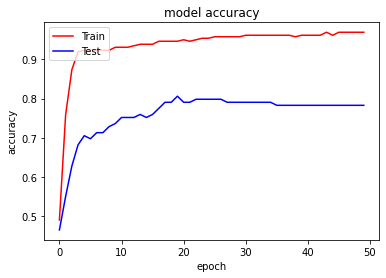

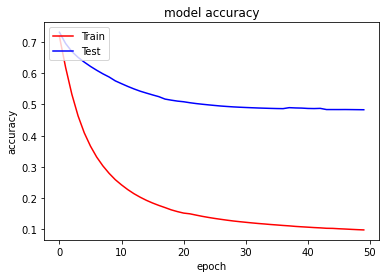

In [323]:
from keras import models 
from keras import layers
from keras import optimizers

# load the dataset
dataset = df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx").values
# split into input (X) and output (y) variables
X = dataset[:,0:10]
y = dataset[:,14]

# define the keras model
model = models.Sequential()
model.add(layers.Dense(12, input_dim=10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=50, batch_size=10, verbose=0)
# evaluate the keras model
_, accuracy = history.model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())
#Create the chart variables which are accuracy and loss
plt.plot(history.history['accuracy'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
#Assign titles and show chart
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plot loss and val loss
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['val_loss'], color="blue")
#Assign titles and show chart
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

While the accuracy displays 93% this is a missleading number because if you look at the chart we can see that test levels out at around 80% this means that the model is only guessing negavties as 81% is the ratio between negative and positive and is the same point where the test line flattens out.

#### Automatic Verification Dataset

In [307]:
model.fit(X, y, validation_split=0.33, epochs=50, batch_size=10)

Epoch 1/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.9770 - val_loss: 0.6597 - val_accuracy: 0.7209
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9770 - val_loss: 0.6662 - val_accuracy: 0.7209
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.6671 - val_accuracy: 0.7209
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.6709 - val_accuracy: 0.7209
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9770 - val_loss: 0.6822 - val_accuracy: 0.7209
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9770 - val_loss: 0.7037 - val_accuracy: 0.7132
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.6973 - val_accuracy: 0.7132
Epoch 8/50
27/27 [==

**Testing the model**

The trouble with this model is that it is heavily bias towards predicating a negative result.

In [308]:
predictions = (history.model.predict(X)>0.5).astype("int32")
# summarize the first 50 cases
for i in range(100):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[-0.3190132843007623, -0.5646552981603382, -0.07340058083721956, -0.3601322146142988, -1.692028809146575, -0.8429272304235247, -1.265070295204846, -1.447311750510825, -0.9519441227971236, -0.8380711393308752] => 0 (expected 0)
[-1.372619320558956, -0.5274315716081861, -0.5369831966512382, -0.53310212064826, -1.692028809146575, -0.8429272304235247, -1.520573876318202, -1.050840205526956, -0.3603580101211585, -1.276087414242483] => 0 (expected 0)
[0.2189983086821451, -0.6018790247124903, 0.2163385540465421, -0.3024755792696451, -1.631108274105293, -0.8429272304235247, 0.2679511914752891, 0.2376923156706174, 0.07953935571481596, -1.188484159260161] => 0 (expected 0)
[0.4207526560507354, -0.1924180326388172, 1.143503785674579, -0.7637286620268748, -1.631108274105293, -0.8429272304235247, -0.4985595518647787, -1.571209108318284, -1.391841488633098, -0.6628646293662321] => 0 (expected 0)
[-0.9691106258217753, -0.3040892122952735, 0.9696603047443223, -1.224981744784105, -1.631108274105293, -0

We can see in the tests is that the network has a strong bias towards negative.

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=10)

Epoch 1/50
27/27 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9234 - val_loss: 0.2313 - val_accuracy: 0.9225
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9234 - val_loss: 0.2360 - val_accuracy: 0.9147
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9310 - val_loss: 0.2417 - val_accuracy: 0.9225
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9272 - val_loss: 0.2466 - val_accuracy: 0.9147
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9272 - val_loss: 0.2546 - val_accuracy: 0.9147
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.9310 - val_loss: 0.2577 - val_accuracy: 0.9147
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.9349 - val_loss: 0.2557 - val_accuracy: 0.9147
Epoch 8/50
27/27 [==

#### Saving and loading the keras model into .h5 format.

In [290]:
from keras.models import model_from_json
model.save("./Models/KerasModel1.h5")
print("model saved, hooray!")

# load the model from Models
loaded_model = models.load_model('./Models/KerasModel1.h5')
predictions = loaded_model.predict(X)
# summarize x cases
for i in range(1):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

model saved, hooray!
[-0.3190132843007623, -0.5646552981603382, -0.07340058083721956, -0.3601322146142988, -1.692028809146575, -0.8429272304235247, -1.265070295204846, -1.447311750510825, -0.9519441227971236, -0.8380711393308752] => 0 (expected 0)


#### Manual k-Fold Cross-Validation

In [326]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(X, y):
    # create model
    model = models.Sequential()
    model.add(layers.Dense(12, input_dim=10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], y[train], epochs=5, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 76.92%
accuracy: 84.62%
accuracy: 79.49%
accuracy: 92.31%
accuracy: 87.18%
accuracy: 84.62%
accuracy: 89.74%
accuracy: 84.62%
accuracy: 82.05%
accuracy: 87.18%
84.87% (+/- 4.36%)


In [327]:
#Saving k-Fold Cross-Validation weights.
model.save("./Models/k-Fold Cross-Validation.h5")
#Loading and running the model
loaded_model = models.load_model('./Models/k-Fold Cross-Validation.h5')
predictions = loaded_model.predict(X)
# summarize x cases
for i in range(1):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[-0.3190132843007623, -0.5646552981603382, -0.07340058083721956, -0.3601322146142988, -1.692028809146575, -0.8429272304235247, -1.265070295204846, -1.447311750510825, -0.9519441227971236, -0.8380711393308752] => 0 (expected 0)


## Conclusion

In conclusion I have ran many models with most models having high performing results. What I have found is that these results are misleading as the confusion matrix analysis suggests it is easy to predict TN but when it comes to TP my model cannot distinguish it. The way to solve this is to implement a data synthesis tool such as SMOTE or even better get more data to take in the positive observations and produce new positive results. Other methods include merging datasets however this will introduce unwanted bias as these datasets will be inconsistent with the dataset I am using. For the AI models I have seen that they work well however the data that they have been fed needs work. 

In future versions of this model, it will include data synthesis using SMOTE to produce positive observations for my models to train on which should boost the performance of my networks. I would also look to integrate this system with an interactable UI and a node.js API so that the model could be used through the internet by users who could use it as an open source, easy to use and free tool. 


In [334]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


## SMOTE

Data synthesis tool

In [336]:
from imblearn.over_sampling import SMOTE
import imblearn
print(imblearn.__version__)

0.9.0


Over Sampling

Random over-sampling:
0    330
1    330
Name: Diabetes, dtype: int64


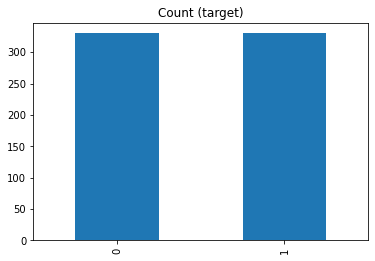

In [380]:
df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
df_class_0 = df[df['Diabetes'] == 0] #majority class
df_class_1 = df[df['Diabetes'] == 1] #minority class

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Diabetes.value_counts())

df_test_over.Diabetes.value_counts().plot(kind='bar', title='Count (target)');

In [381]:
test0 = pd.DataFrame(df_test_over)
test0.to_excel("./SMOTE/NewSMOTEDataOverSample.xlsx", index=False)

Understampling

Random under-sampling:
0    60
1    60
Name: Diabetes, dtype: int64
Num records =  120


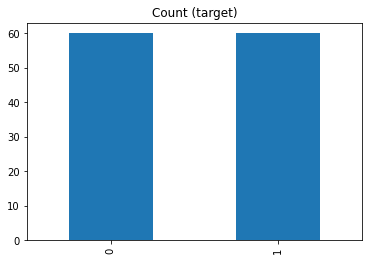

In [375]:
#Code inspired from https://oralytics.com/2019/07/01/managing-imbalanced-data-sets-with-smote-in-python/
count_class_0, count_class_1 = df.Diabetes.value_counts()

df = pd.read_excel("./StdNormScaleData/StandardizeData.xlsx")
df_class_0 = df[df['Diabetes'] == 0] #majority class
df_class_1 = df[df['Diabetes'] == 1] #minority class

# Sample Majority class (y=0, to have same number of records as minority calls (y=1)
df_class_0_under = df_class_0.sample(count_class_1)
# join the dataframes containing y=1 and y=0
df_test_under = pd.concat([df_class_0_under, df_class_1])

print('Random under-sampling:')
print(df_test_under.Diabetes.value_counts())
print("Num records = ", df_test_under.shape[0])

df_test_under.Diabetes.value_counts().plot(kind='bar', title='Count (target)');

In [376]:
test = pd.DataFrame(df_test_under)
test.to_excel("./SMOTE/NewSMOTEDataUnderSample.xlsx", index=False)

4/4 [==============================] - 0s 3ms/step - loss: 0.5528 - accuracy: 0.6500
Accuracy: 65.00
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


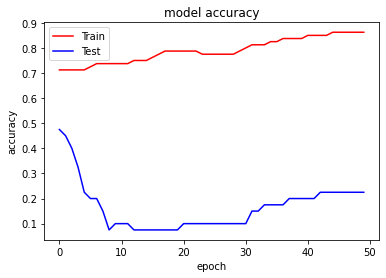

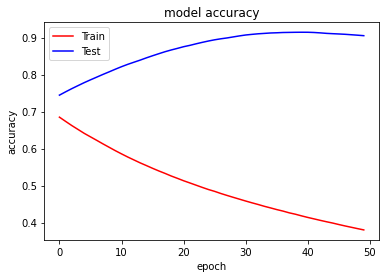

In [394]:
# load the dataset
dataset = df = pd.read_excel("./SMOTE/NewSMOTEDataUnderSample.xlsx").values
# split into input (X) and output (y) variables
X = dataset[:,0:10]
y = dataset[:,14]

# define the keras model
model = models.Sequential()
model.add(layers.Dense(12, input_dim=10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, validation_split=0.33, epochs=50, batch_size=10, verbose=0)
# evaluate the keras model
_, accuracy = history.model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
print(history.history.keys())
#Create the chart variables which are accuracy and loss
plt.plot(history.history['accuracy'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
#Assign titles and show chart
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plot loss and val loss
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['val_loss'], color="blue")
#Assign titles and show chart
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [396]:
predictions = (history.model.predict(X)>0.5).astype("int32")
# summarize the first 50 cases
for i in range(100):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[-1.148447823482744, -0.3971485286756538, -0.9426179854885045, 0.04346423279827718, -0.5954591784035029, -0.8429272304235247, 0.2679511914752891, 0.8571791047079125, 0.6711254683907816, -0.6628646293662321] => 0 (expected 0)
[-0.4086818831312469, -0.2110298959148932, -0.1892962347907242, -0.3024755792696451, -1.143743993775039, -0.8429272304235247, -0.4985595518647787, 0.5598254459700108, 0.8379830899147709, -0.04964184448998184] => 0 (expected 0)
[-0.588019080792216, -0.5646552981603382, -0.2472440617674765, -0.3601322146142988, -1.021902923692475, -0.8429272304235247, 0.01244761036193313, 1.972255324975044, 1.930142067162707, 1.089200470280197] => 0 (expected 0)
[-0.27417898488552, 1.184859849790811, -1.232357120372266, 1.254253575036006, 1.90228275828905, 1.186342028003479, 0.01244761036193313, -0.1339997577517597, -0.1479937645451707, -0.3124516094369463] => 0 (expected 0)
[1.070849997571748, -0.4529841185038819, 2.302460325209626, -0.99435520340549, 0.3183488472157237, 1.186342028

## Refrences
U.S. Department of Health and Human Services. (n.d.). What is Diabetes? Retrieved from National Institutes of Health : https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes

